In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



In [2]:
df1 = pd.read_csv("Dataset_of_Diabetes.csv")
df1.head(6)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634,34224,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N


In [3]:
df1.shape

(1000, 14)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [5]:
df1.isna().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [6]:
df1.duplicated().sum()

0

In [7]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [8]:
df2 = df1.drop(columns=["ID", "No_Pation"])
df2.head(6) 

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,F,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N


In [9]:
print(df2['CLASS'].unique())         
print(df2['CLASS'].value_counts())   

['N' 'N ' 'P' 'Y' 'Y ']
CLASS
Y     840
N     102
P      53
Y       4
N       1
Name: count, dtype: int64


In [10]:
df2['CLASS'] = df2['CLASS'].str.strip().str.upper()

In [ ]:
print(df2['CLASS'].unique())         
print(df2['CLASS'].value_counts())   

['N' 'P' 'Y']
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


In [12]:
classifi_diabetic=df2["CLASS"].value_counts().reset_index()
classifi_diabetic.style.background_gradient(cmap="Blues")
#N= Non Diabetic, P=Pre Diabetic, Y=Diabetic

,CLASS,count
0,Y,844
1,N,103
2,P,53


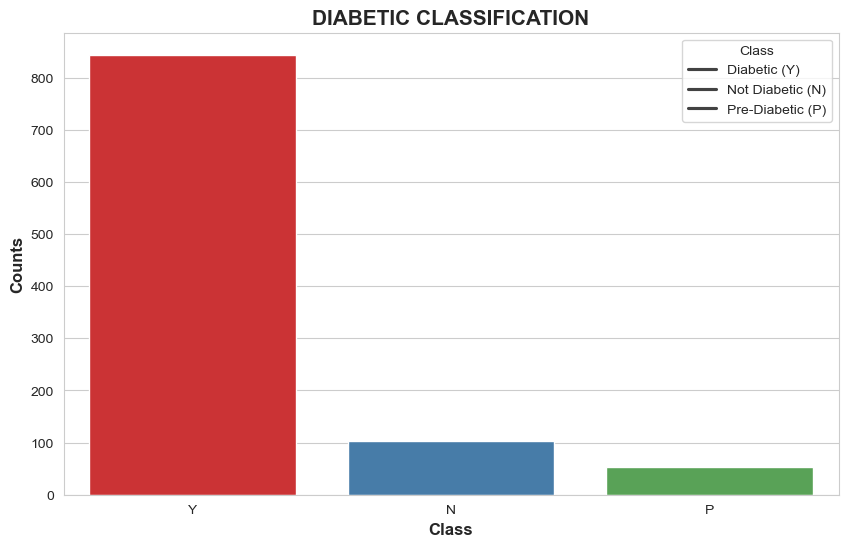

In [13]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_diabetic,x="CLASS",y="count",hue="CLASS",palette="Set1")
plt.xlabel("Class",fontweight="bold",fontsize=12)
plt.ylabel("Counts",fontweight="bold",fontsize=12)
plt.title("DIABETIC CLASSIFICATION",fontweight="bold",fontsize=15)
plt.legend(
    title="Class",
    labels=["Diabetic (Y)", "Not Diabetic (N)", "Pre-Diabetic (P)"]
)
plt.show()

In [14]:
df2["Gender"]=df2["Gender"].str.strip().str.upper()
df2["Gender"].unique()

array(['F', 'M'], dtype=object)

In [15]:
df2["Gender"]=df2["Gender"].replace({"M":0,"F":1})
df2.head(6)

C:\Users\CoreTech\AppData\Local\Temp\ipykernel_14512\3654918950.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["Gender"]=df2["Gender"].replace({"M":0,"F":1})


,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,1,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N


In [ ]:
df2["CLASS"]=df2["CLASS"].astype("category") # so, I will have integer, float, and category data types in the DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Gender  1000 non-null   int64   
 1   AGE     1000 non-null   int64   
 2   Urea    1000 non-null   float64 
 3   Cr      1000 non-null   int64   
 4   HbA1c   1000 non-null   float64 
 5   Chol    1000 non-null   float64 
 6   TG      1000 non-null   float64 
 7   HDL     1000 non-null   float64 
 8   LDL     1000 non-null   float64 
 9   VLDL    1000 non-null   float64 
 10  BMI     1000 non-null   float64 
 11  CLASS   1000 non-null   category
dtypes: category(1), float64(8), int64(3)
memory usage: 87.2 KB


In [17]:
df2['CLASS_CODE'] = df2['CLASS'].cat.codes #it will assign each category a numeric value: 'N' → 0, 'P' → 1, 'Y' → 2

In [18]:
df2.head(10)

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,CLASS_CODE
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,0
5,1,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N,0
6,1,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N,0
7,0,48,4.7,47,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N,0
8,0,43,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N,0
9,1,32,3.6,28,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N,0


In [19]:
#Let create classification report by gender 
repo_classifi=df2.groupby("Gender")[[ 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']].sum().reset_index()
print(repo_classifi)

   Gender      Urea     Cr    HbA1c     Chol       TG     HDL      LDL  \
0       0  3064.643  43556  4667.10  2705.72  1363.71  638.10  1504.68   
1       1  2060.100  25387  3614.06  2157.10   985.90  566.65  1105.11   

     VLDL       BMI  
0  1400.3  16888.86  
1   454.4  12689.16  


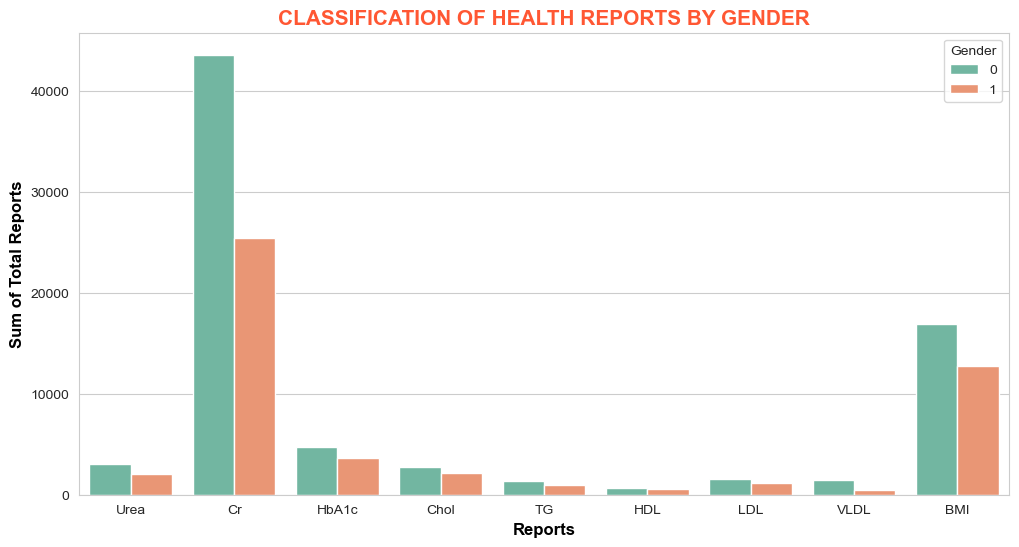

In [20]:
repo_melted=repo_classifi.melt(
    id_vars="Gender",
    value_vars=['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'],
    var_name="Reports",
    value_name="sum"

)
plt.figure(figsize=(12,6))
barplot=sns.barplot(data=repo_melted,x="Reports",y="sum",hue="Gender",palette="Set2")
plt.xlabel("Reports",fontweight="bold",fontsize=12,color="black")
plt.ylabel("Sum of Total Reports",fontweight="bold",fontsize=12,color="black")
plt.title("CLASSIFICATION OF HEALTH REPORTS BY GENDER",fontweight="bold",fontsize=15,color="#FF5733")
plt.show()

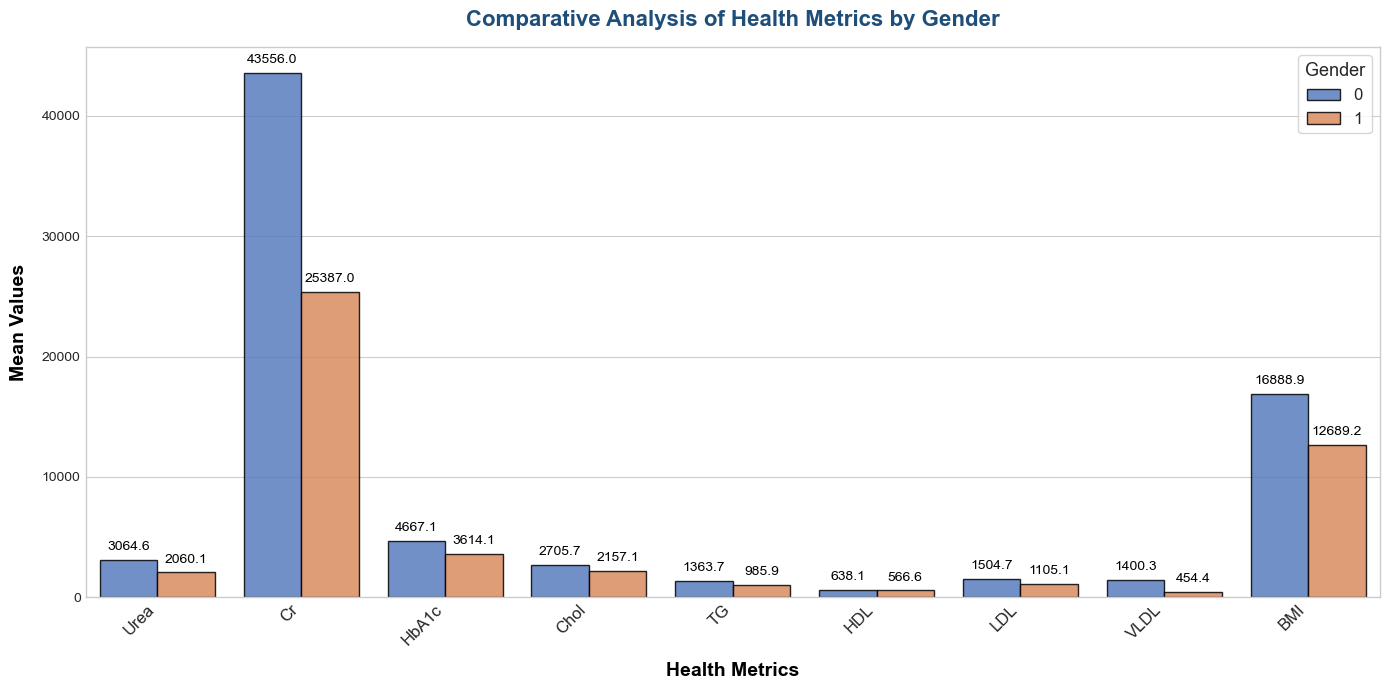

In [ ]:
repo_melted = repo_classifi.melt(
    id_vars="Gender",
    value_vars=['Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI'],
    var_name="Health Metrics",
    value_name="Values"
)

plt.style.use('seaborn-v0_8-whitegrid')  
plt.figure(figsize=(14, 7), dpi=100)  

barplot = sns.barplot(
    data=repo_melted,
    x="Health Metrics",
    y="Values",
    hue="Gender",
    palette="muted",  
    edgecolor="black",  
    errorbar="sd",  
    alpha=0.85  
)

plt.xlabel("Health Metrics", fontweight="bold", fontsize=14, color="black", labelpad=10)
plt.ylabel("Mean Values", fontweight="bold", fontsize=14, color="black", labelpad=10)
plt.title(
    "Comparative Analysis of Health Metrics by Gender",
    fontweight="bold",
    fontsize=16,
    color="#1F4E79",  
    pad=15
)


plt.xticks(rotation=45, ha="right", fontsize=12)

for p in barplot.patches:
    height = p.get_height()
    if height > 0:  
        barplot.annotate(
            f"{height:.1f}",
            (p.get_x() + p.get_width() / 2., height),
            ha="center",
            va="bottom",
            fontsize=10,
            color="black",
            xytext=(0, 5),  
            textcoords="offset points"
        )

plt.legend(title="Gender", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)

plt.tight_layout()

plt.savefig("health_metrics_by_gender.png", dpi=300, bbox_inches="tight")

plt.show()

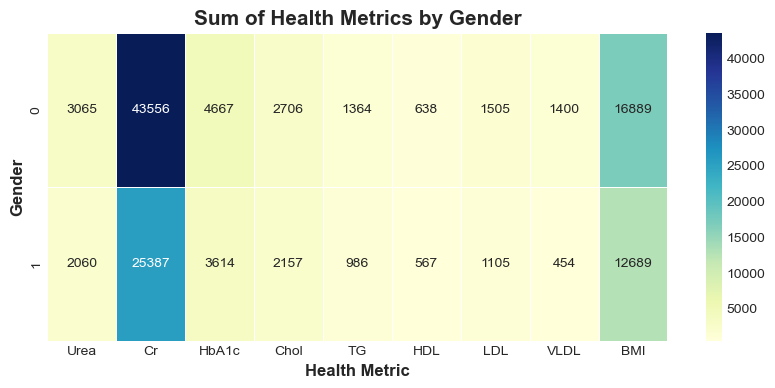

In [22]:
repo_classifi.set_index("Gender", inplace=True)

plt.figure(figsize=(10, 4))
sns.heatmap(repo_classifi, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Sum of Health Metrics by Gender", fontweight="bold", fontsize=15)
plt.xlabel("Health Metric", fontweight="bold", fontsize=12)
plt.ylabel("Gender", fontweight="bold", fontsize=12)

plt.show()

In [23]:
x=df2.drop(columns=["CLASS","CLASS_CODE"])
y=df2["CLASS_CODE"]

In [24]:
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [26]:
model=RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_res,y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

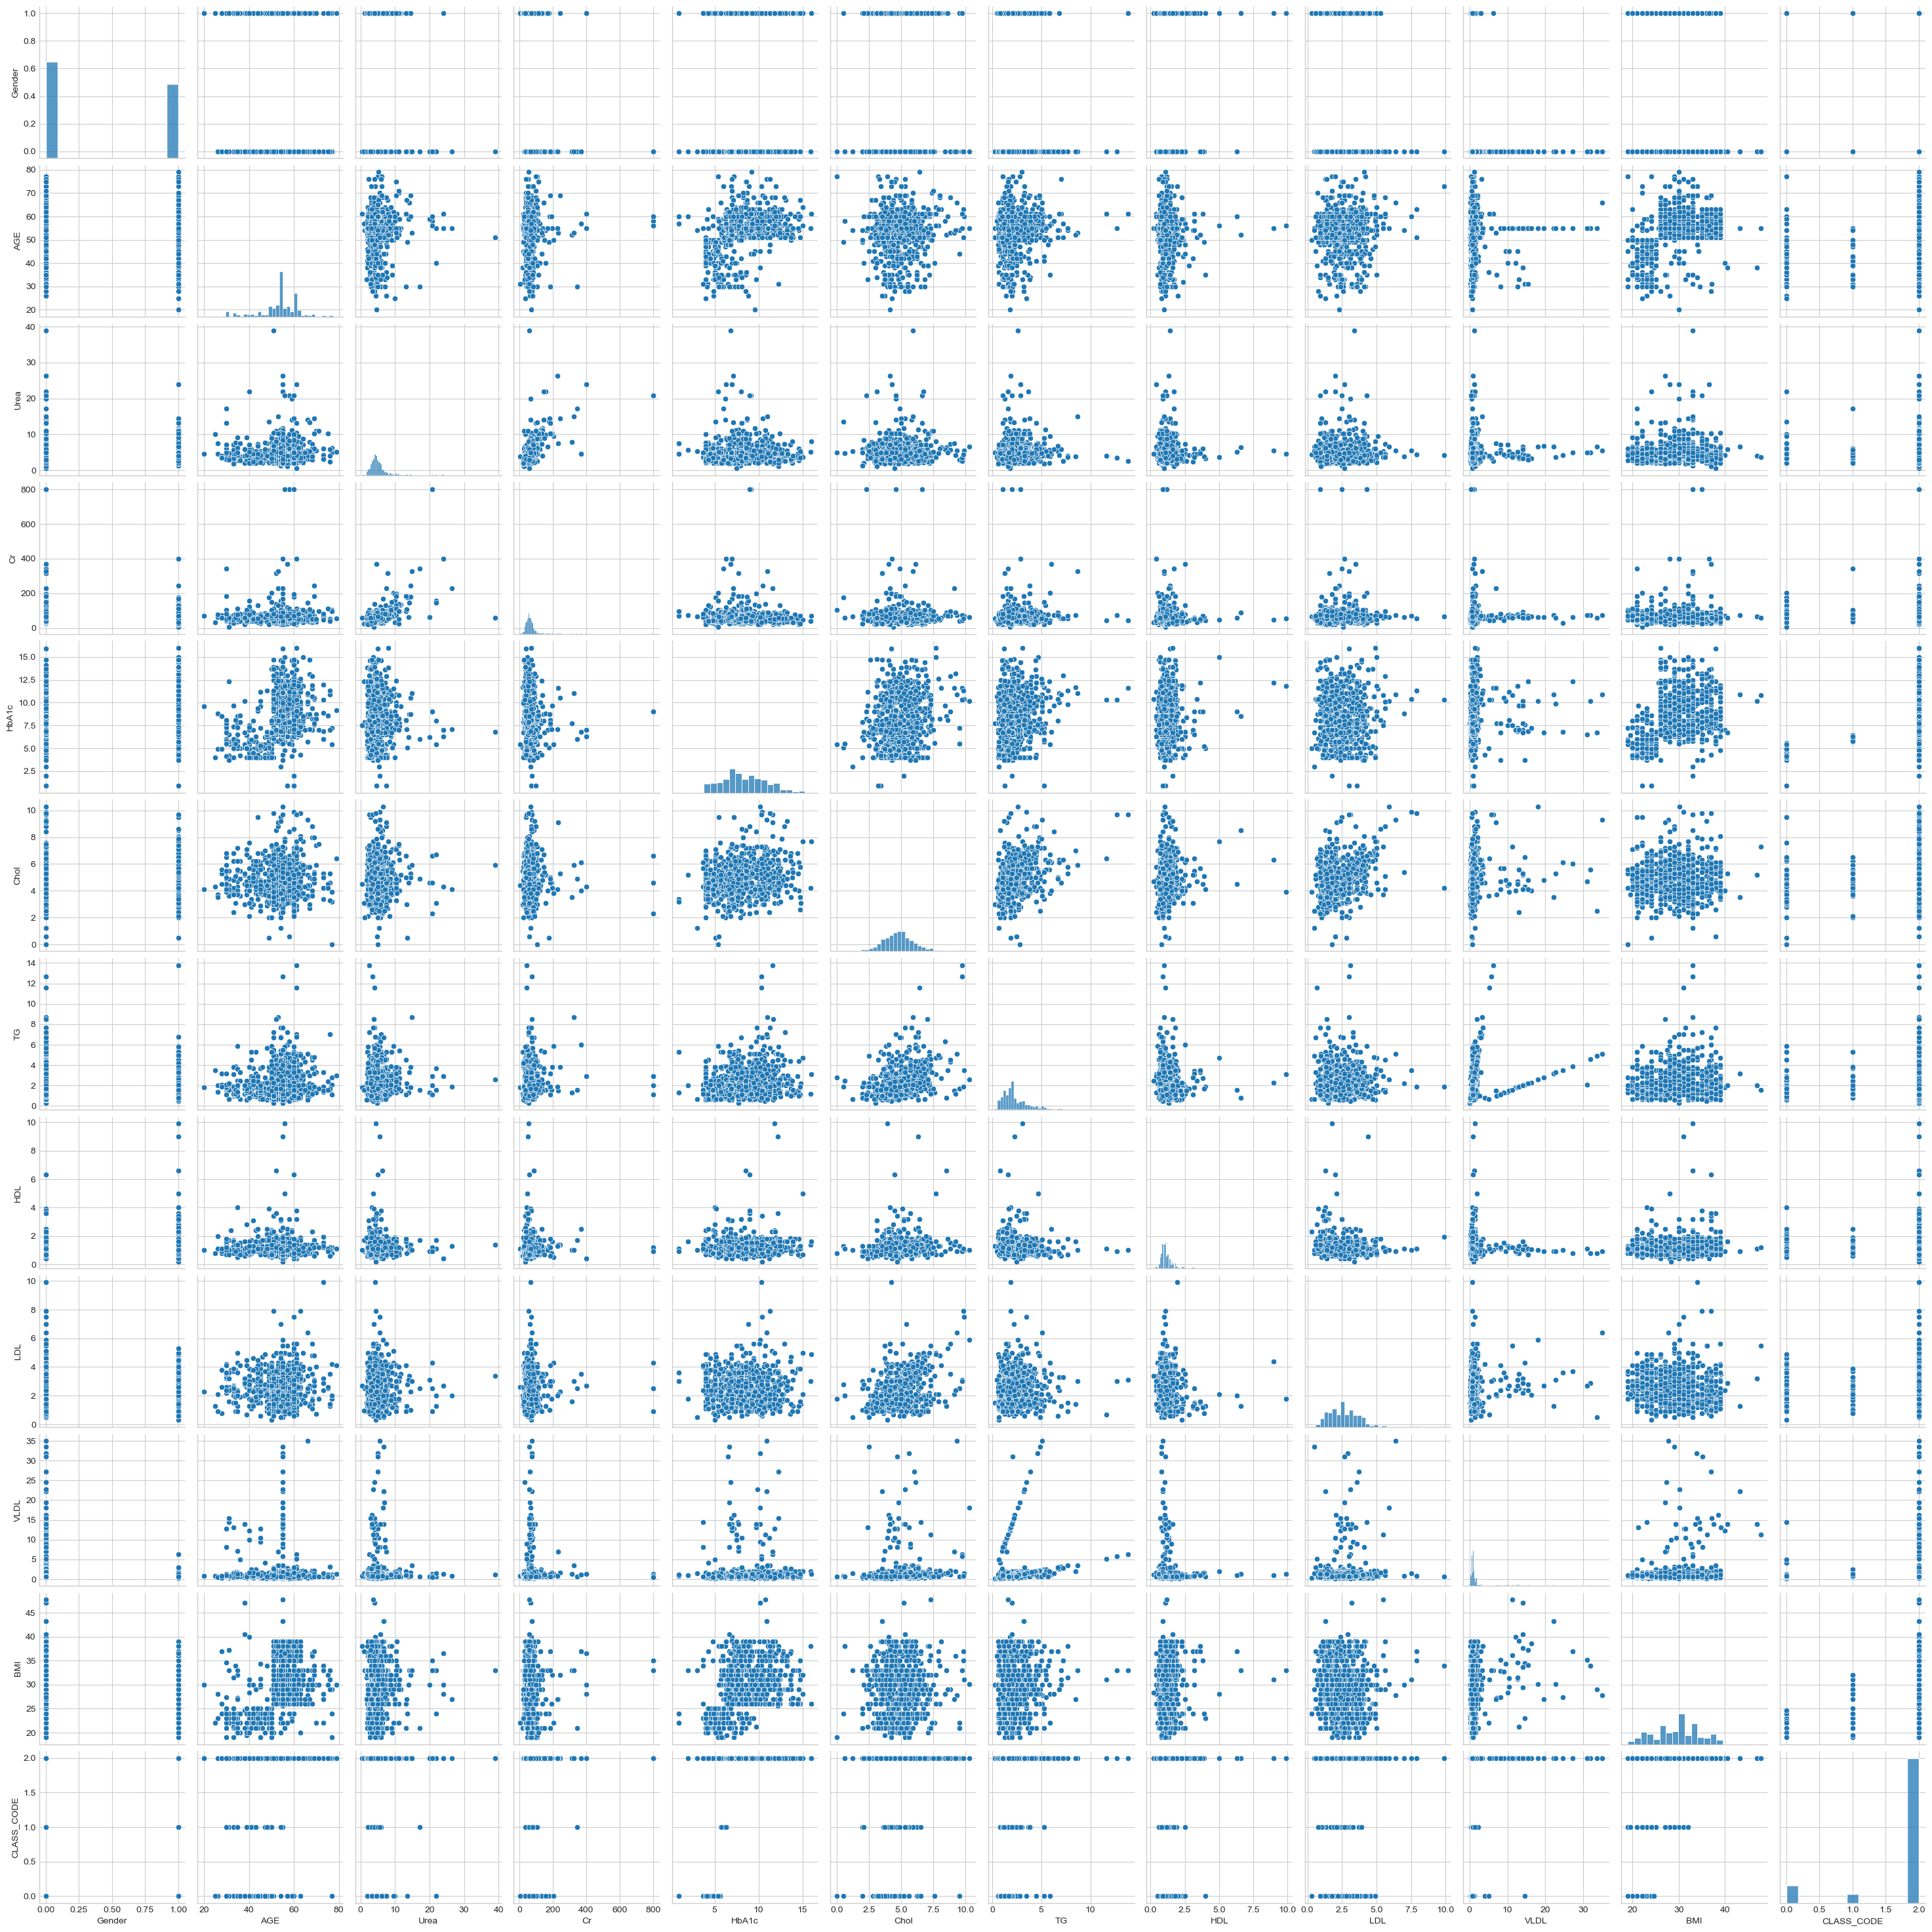

In [28]:
sns.pairplot(df2)
plt.show()

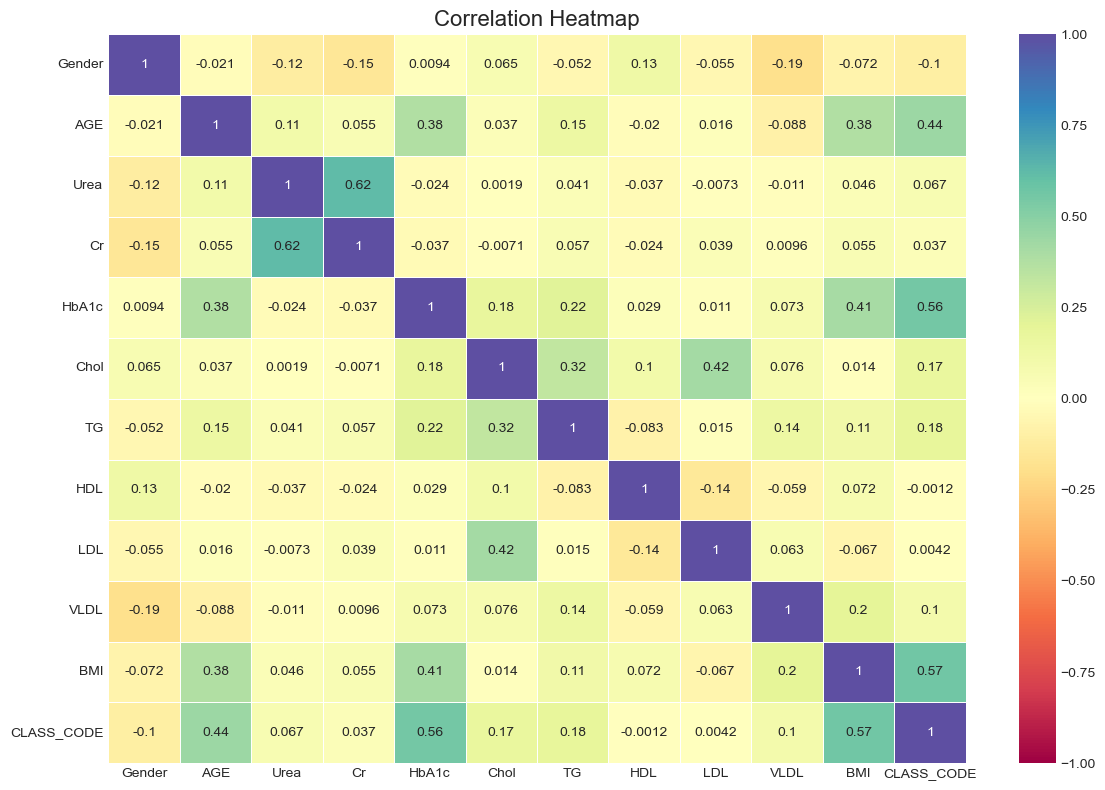

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(numeric_only=True), 
            annot=True, 
            cmap="Spectral",  
            annot_kws={"size": 10},  
            vmin=-1, vmax=1,  
            linewidths=.5)  
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()

In [34]:
# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Support Vector Machine": SVC(class_weight='balanced', probability=True),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
}

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(x_test)

    try:
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(x_test)[:, 1]  
        elif hasattr(model, "decision_function"):
            y_proba = model.decision_function(x_test)
        else:
            y_proba = None
    except Exception as e:
        y_proba = None
        print(f"Warning: Could not compute probabilities for {name}. Reason: {str(e)}")

    print(f" {name}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred):.4f}")

    if y_proba is not None:
        try:
            roc_auc = roc_auc_score(y_test, y_proba)
            print(f" ROC-AUC Score: {roc_auc:.4f}")
        except ValueError as e:
            print(f" ROC-AUC Score could not be calculated: {str(e)}")
    else:
        print(" ROC-AUC Score: Not available for this model")

    print(" Classification Report:\n", classification_report(y_test, y_pred))
    print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)


 Logistic Regression
 Accuracy: 0.8900
 ROC-AUC Score could not be calculated: multi_class must be in ('ovo', 'ovr')
 Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        21
           1       0.20      0.50      0.29         6
           2       0.99      0.91      0.95       173

    accuracy                           0.89       200
   macro avg       0.62      0.74      0.65       200
weighted avg       0.93      0.89      0.91       200

 Confusion Matrix:
 [[ 17   4   0]
 [  2   3   1]
 [  7   8 158]]
------------------------------------------------------------
 Support Vector Machine
 Accuracy: 0.9300
 ROC-AUC Score could not be calculated: multi_class must be in ('ovo', 'ovr')
 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.50      1.00      0.67         6
           2       0.98      0.94      0.9

In [51]:
import joblib

# Save the model
joblib.dump(model, "random_forest_model.pkl")

['random_forest_model.pkl']